In [107]:
import pandas as pd
from statsbombpy import sb
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) 

In [108]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-07-25T10:28:52.038697,None,None,2023-07-25T10:28:52.038697
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
7,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
8,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
9,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473


In [111]:
sb.matches(competition_id=43, season_id=54)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3889149,1986-06-29,20:00:00.000,International - FIFA World Cup,1986,Argentina,Germany,3,2,available,unscheduled,2023-06-28T11:20:34.252935,None,3,Semi-finals,Estadio Azteca,NaN,Carlos Salvador Bilardo,Franz Beckenbauer,1.1.0,2,2
1,3889148,1986-06-26,00:00:00.000,International - FIFA World Cup,1986,Argentina,Belgium,2,0,available,unscheduled,2023-06-28T10:52:50.780663,None,2,Semi-finals,Estadio Azteca,Antonio Márquez Ramírez,Carlos Salvador Bilardo,Guy Thys,1.1.0,2,2
2,3750191,1986-06-22,19:00:00.000,International - FIFA World Cup,1986,Argentina,England,2,1,available,scheduled,2023-06-28T10:54:22.856220,2021-06-13T16:17:31.694,1,Quarter-finals,Estadio Azteca,Ali Bin Nasser,Carlos Salvador Bilardo,Bobby Robson,1.1.0,2,2


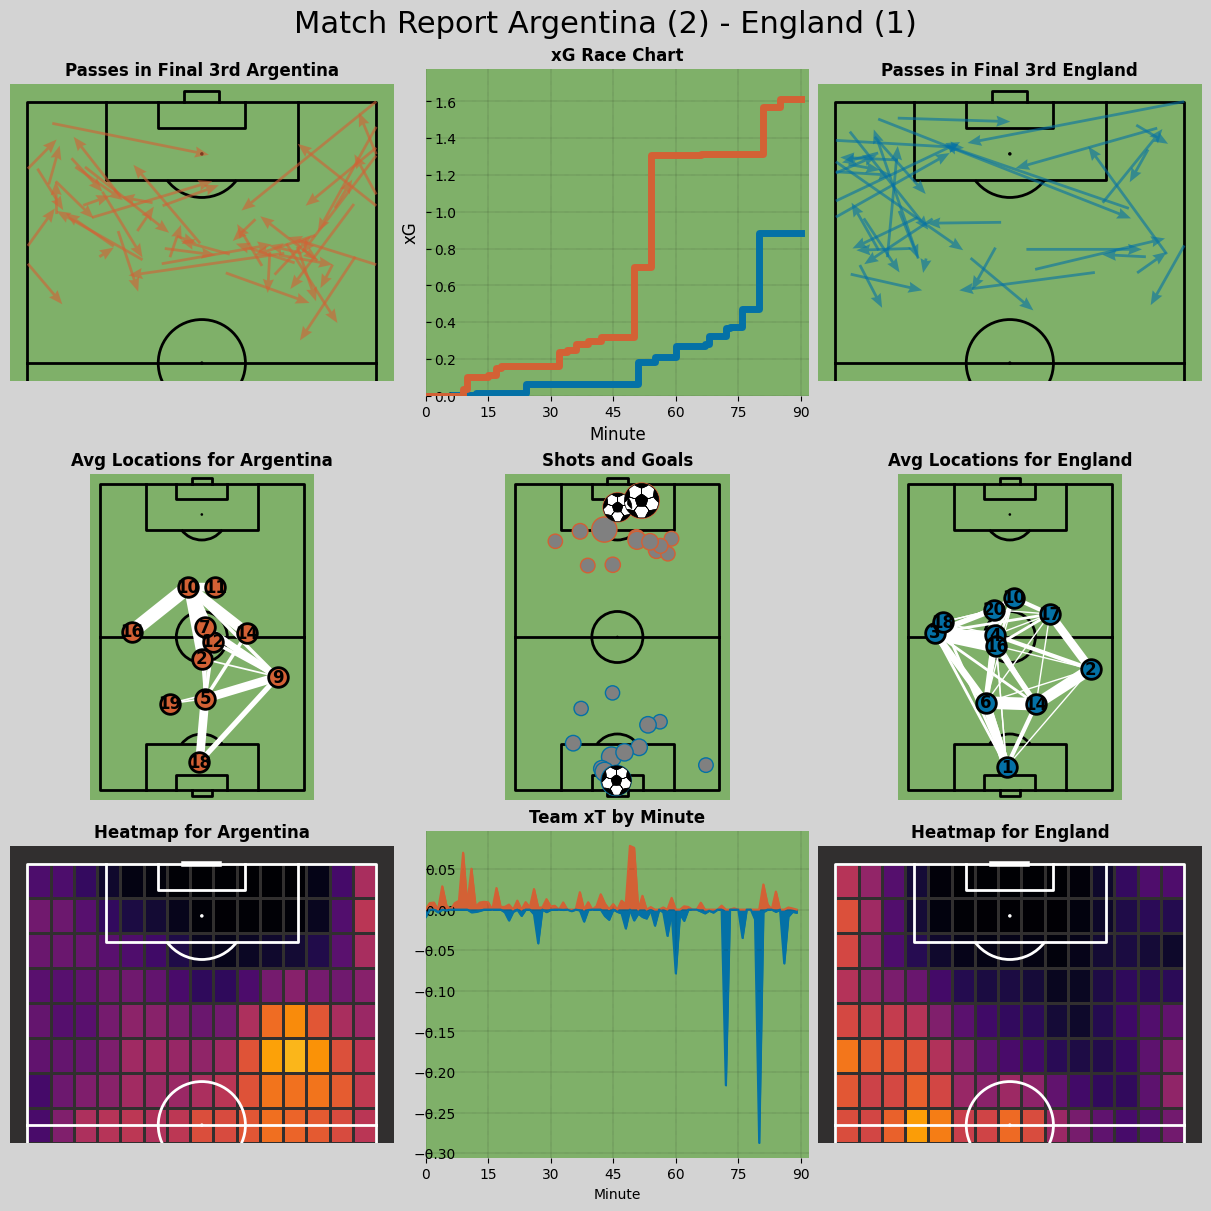

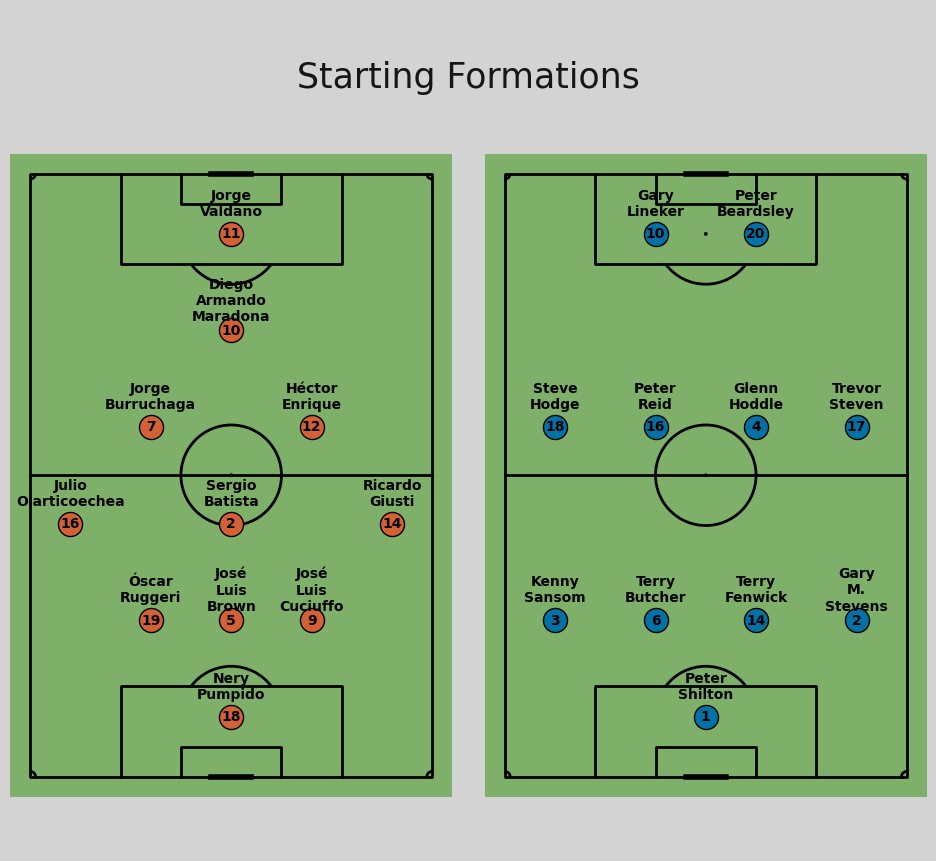

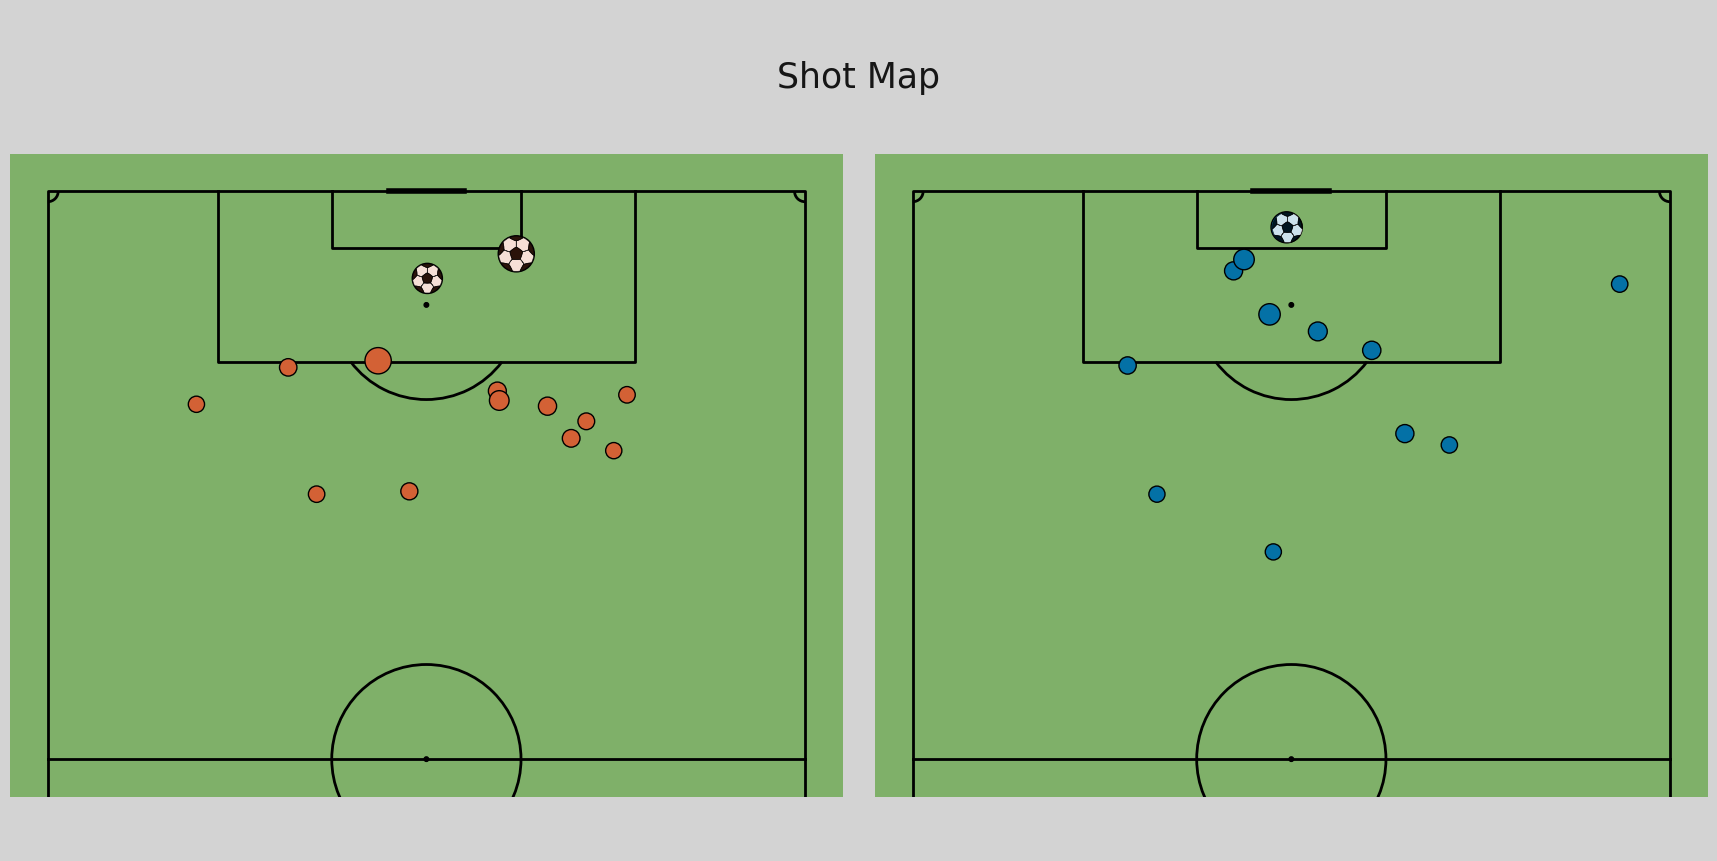

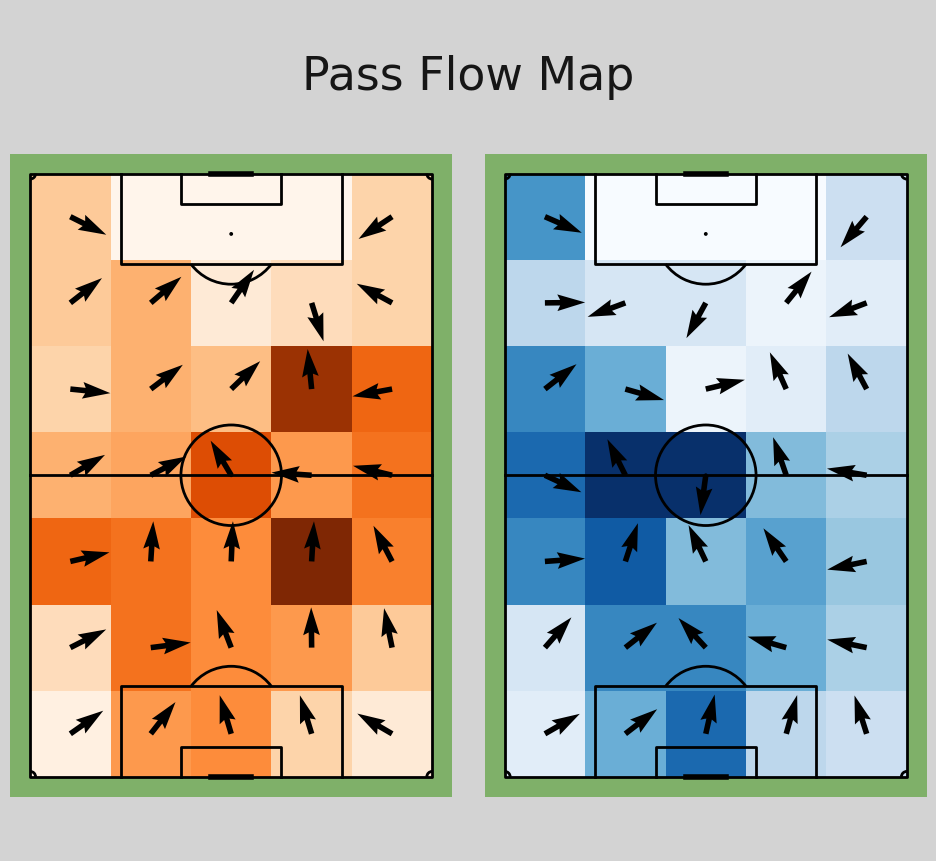

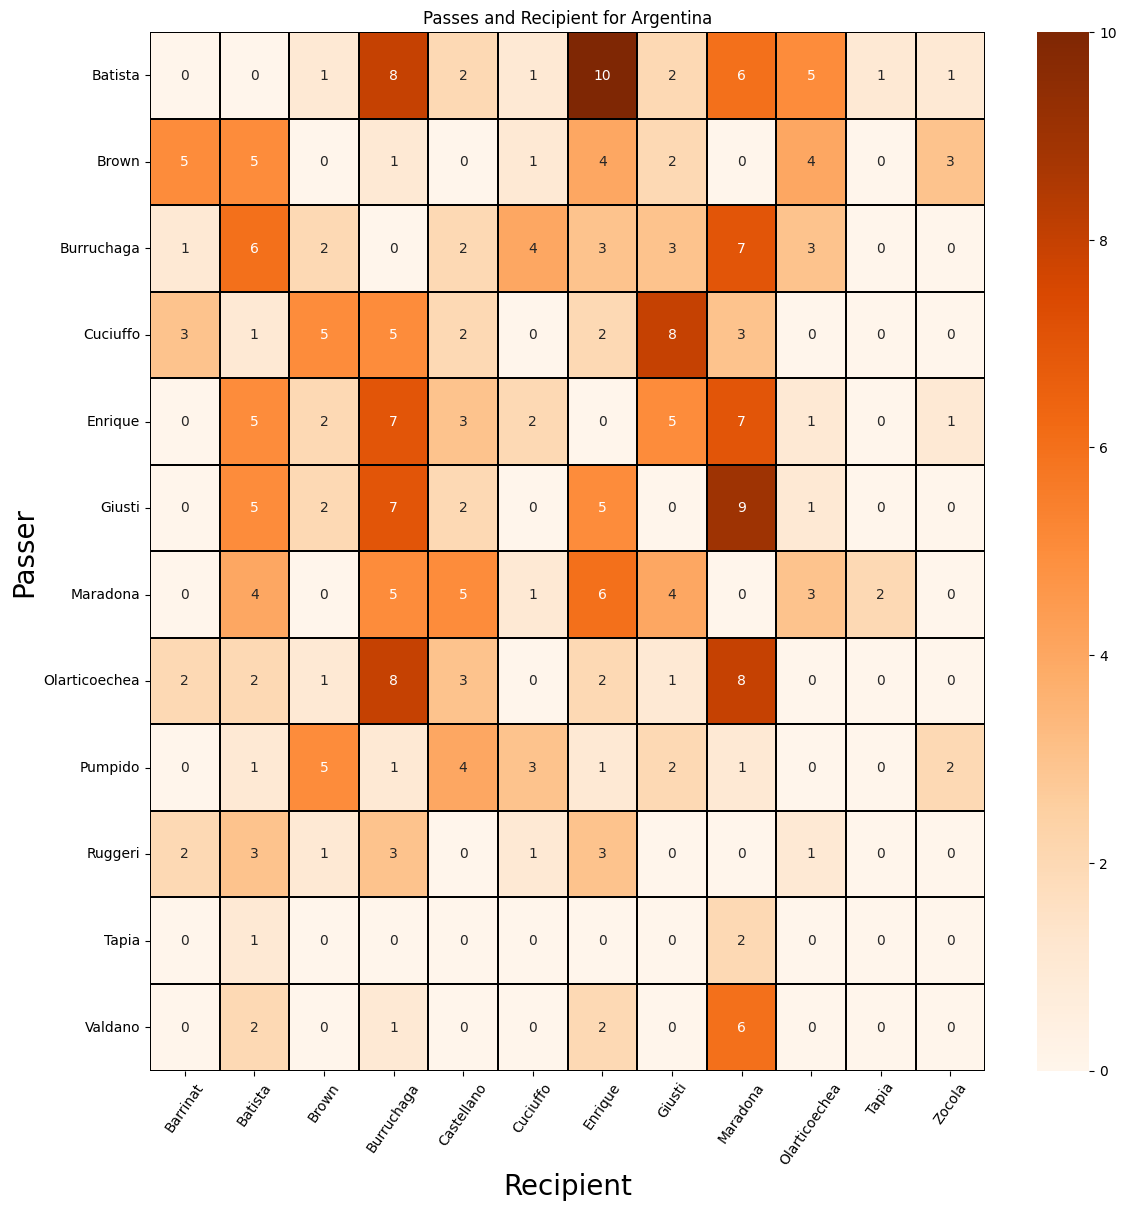

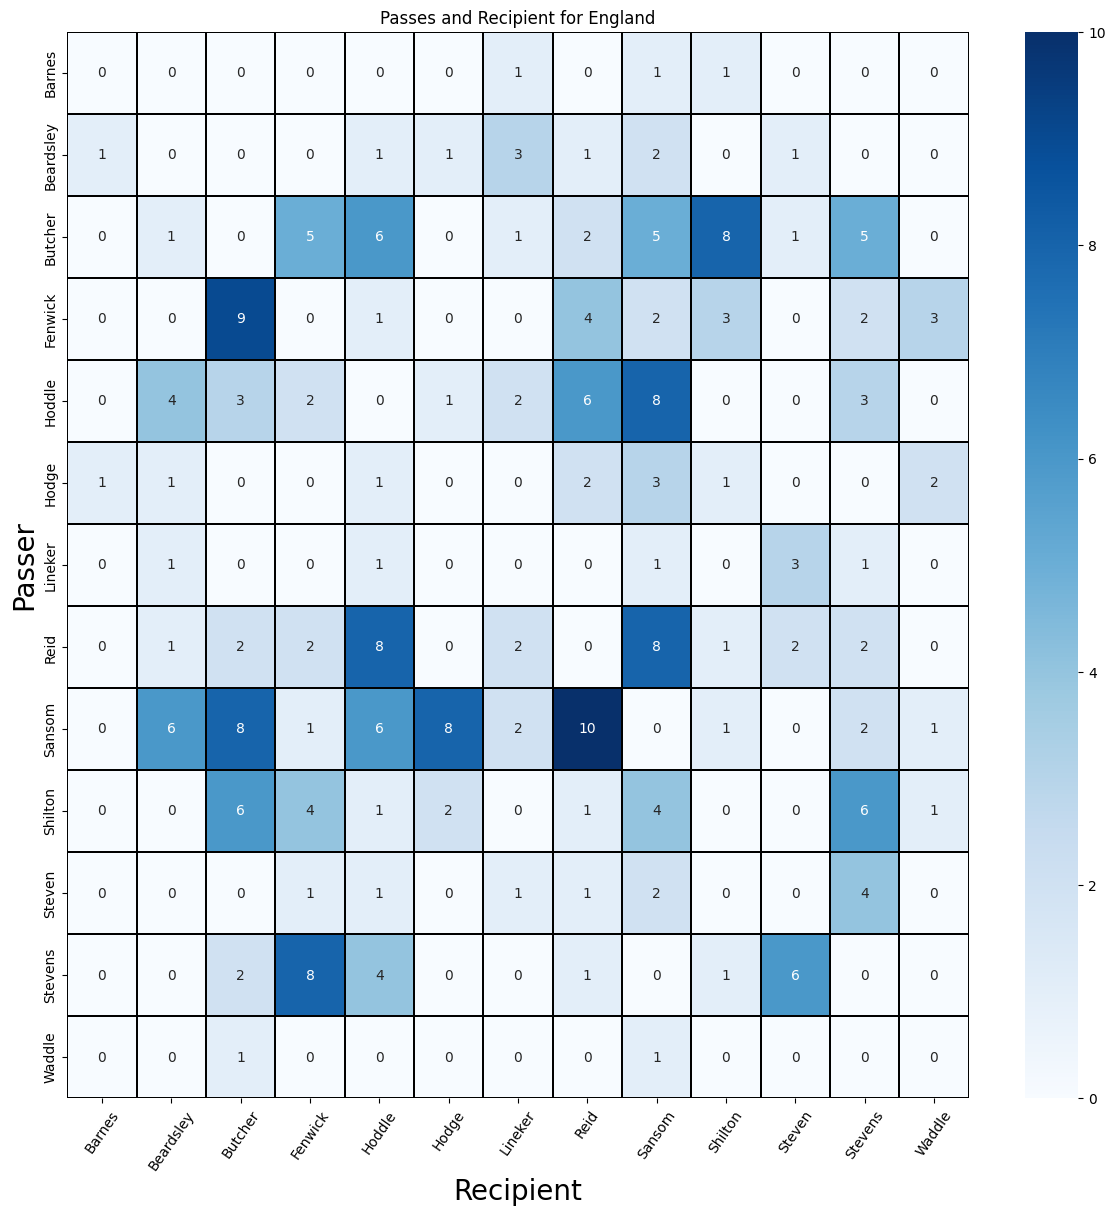

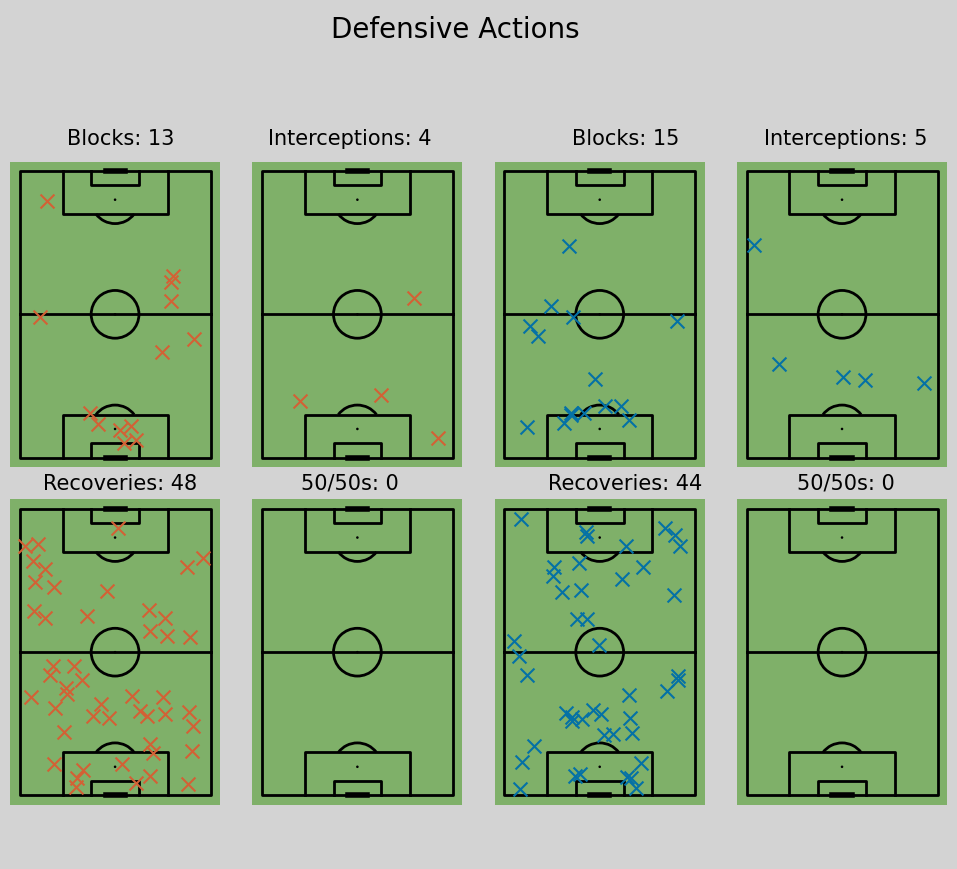

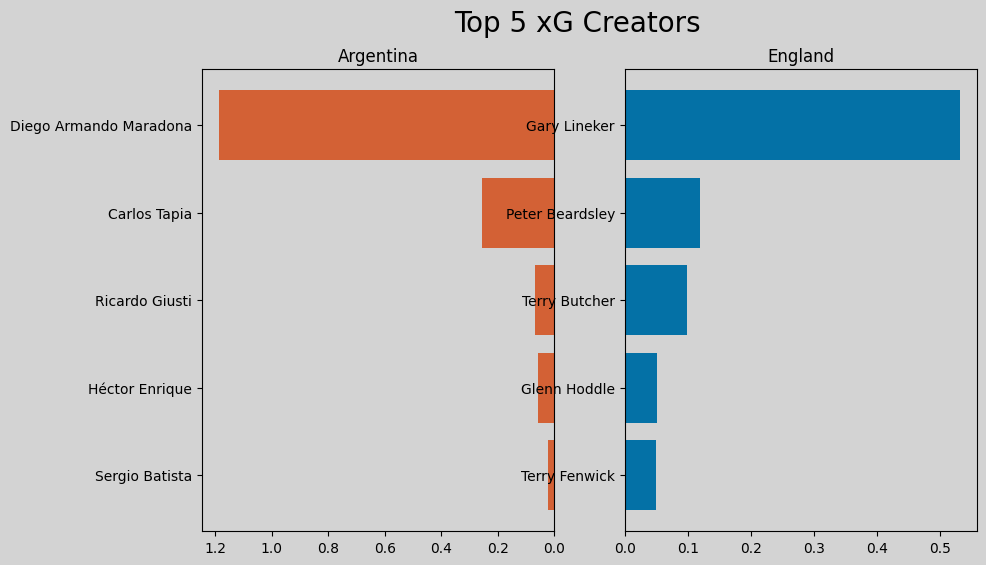

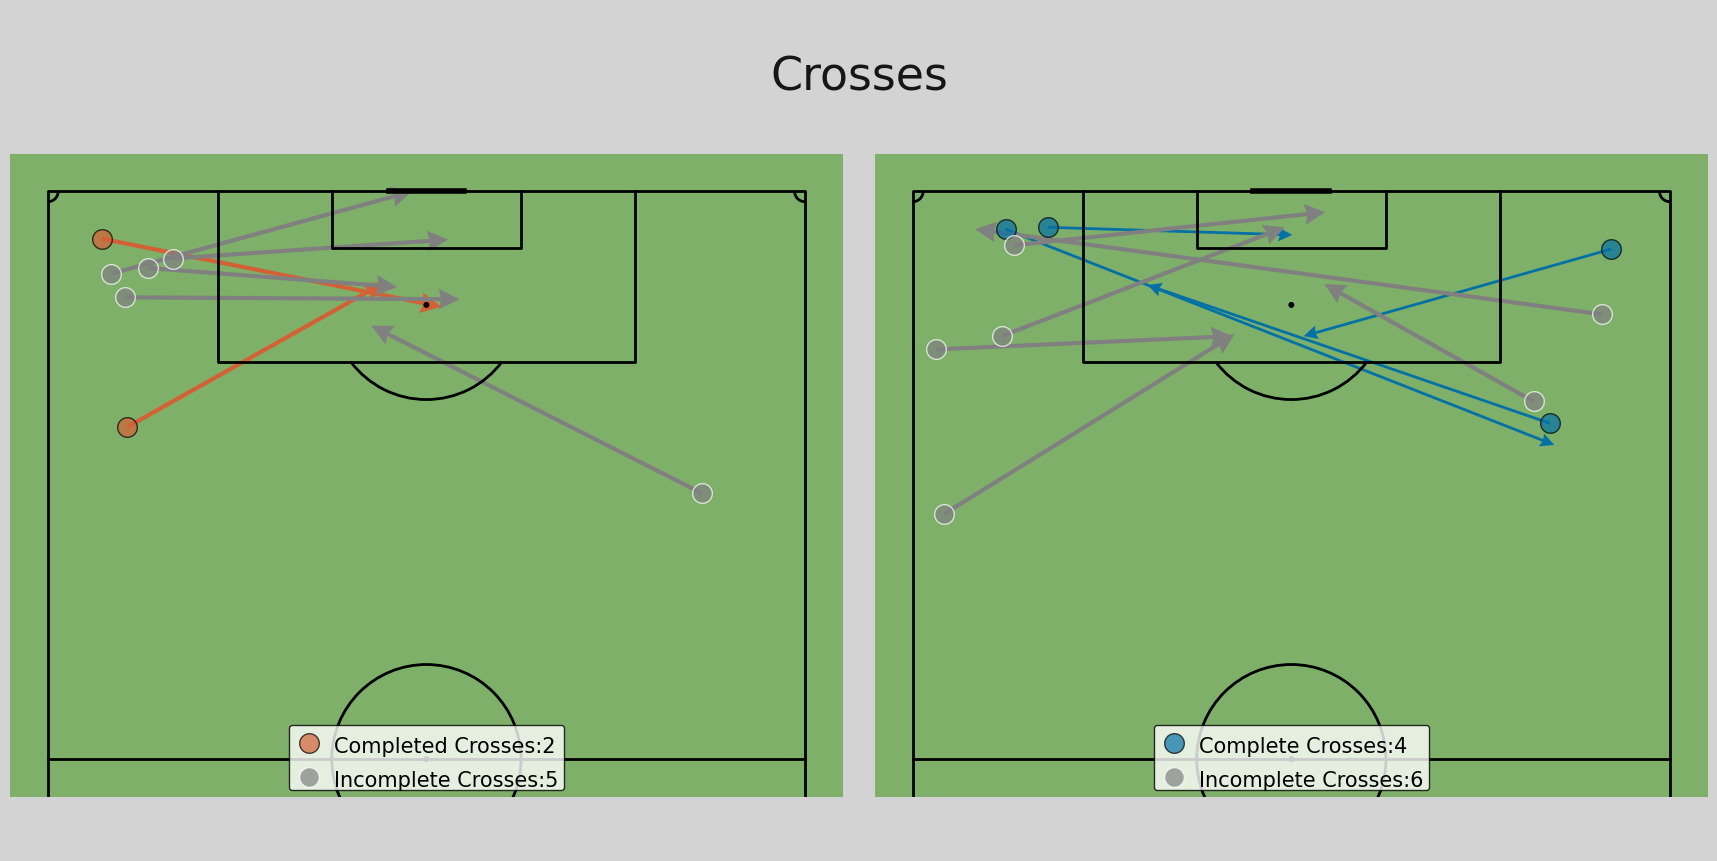

In [48]:
match_report_full(matchId=3750191, # Statsbomb match id
            home_team = 'Argentina', # Home team will be orange
            away_team = 'England', # Away team will be blue
            save='y' #'y' for save 'n' for dont
            )

In [47]:
def match_report_full(matchId, save, home_team, away_team):
    
    from statsbombpy import sb

    import pandas as pd
    import numpy as np


    from mplsoccer.pitch import Pitch
    from matplotlib.colors import to_rgba
    from mplsoccer import Pitch, VerticalPitch, Sbopen

    import seaborn as sns


    import matplotlib.gridspec as gridspec
    import matplotlib.pyplot as plt
    from matplotlib.backends.backend_pdf import PdfPages, PdfFile

    
    import warnings

    from PIL import Image

    from highlight_text import HighlightText, ax_text, fig_text
    from scipy import stats


    from highlight_text import htext

    from scipy.ndimage import gaussian_filter

#     Load in game from Mplsoccers Statsbomb parser
    parser = Sbopen()
    match = matchId
    match_files = [match]
    df = pd.concat([parser.event(file)[0] for file in match_files])
    event, related, freeze, tactics = parser.event(match)
    lineups = parser.lineup(match)
    

    
#    Visuals of pitch and pitchlines
    pitchColor = "#7FB069"
    figColor = "#7FB069"
    linesColor = "black"
    home_team_color = '#D36135'
    away_team_color = '#0471A6'
    home_edgecolor='black'
    away_edgecolor='black'

#     Ignore errors 
    warnings.filterwarnings("ignore")

#     Statsbomb logo
    im = Image.open("sb_text_logo.png")
    
#     Gets the short hand name of players and merges it with the main df
    short_names = lineups[['player_id', 'player_nickname', 'jersey_number']]
    df = df.merge(short_names, on='player_id')
    
#     remove penalties from the df
    df = df[df['period']<5]
    
#     Drop the fullname and only leave the player_nickname
    df.drop('player_name',axis=1, inplace=True)
    
#     Dataframe for shots
    shots = df[df.type_name == "Shot"]

    shots = shots[['team_name', 'player_nickname','jersey_number', 'minute', 'second',"x","y",
                   'shot_statsbomb_xg', 'outcome_name', "type_name", "id"]]

    shots = shots.sort_values('minute', ascending=True).reset_index()

    goals = shots[shots.outcome_name == 'Goal']


    

    
#     Sorted shots and goals dataframes
    home_team_shots = shots[shots["team_name"]== home_team]
    home_team_goals = home_team_shots[home_team_shots["outcome_name"]=="Goal"]
    home_goals_count = home_team_goals.count()['index']

    agg_xg_h = (home_team_shots.groupby(['player_nickname', "team_name"]).agg({'shot_statsbomb_xg':'sum'}).reset_index())
    agg_xg_h = agg_xg_h.sort_values(by =["shot_statsbomb_xg"], ascending =False)
    agg_xg_h = agg_xg_h.head(5)
    agg_xg_h = agg_xg_h.reset_index(drop=True)

    away_team_shots = shots[shots["team_name"]== away_team]
    away_team_goals = away_team_shots[away_team_shots["outcome_name"]=="Goal"]

    agg_xg_a = (away_team_shots.groupby(['player_nickname', "team_name"]).agg({'shot_statsbomb_xg':'sum'}).reset_index())
    agg_xg_a = agg_xg_a.sort_values(by =["shot_statsbomb_xg"], ascending =False)
    agg_xg_a = agg_xg_a.head(5)
    agg_xg_a = agg_xg_a.reset_index(drop=True)

    away_goals_count = away_team_goals.count()['index']
    
#     Empty lists for xG race chart
    a_xG = [0]
    h_xG = [0]
    a_min = [0]
    h_min = [0]
    h_min_goals = []
    a_min_goals = []
    h_goals = []

#     Fills the empty lists with the shot and goal data from dataframes
    for i in range(len(shots['shot_statsbomb_xg'])):
            if shots['team_name'][i]==home_team:
                h_xG.append(shots['shot_statsbomb_xg'][i])
                h_min.append(shots['minute'][i])

                if shots['outcome_name'][i]=='Goal':
                    h_min_goals.append(shots['minute'][i])

            if shots['team_name'][i]==away_team:
                a_xG.append(shots['shot_statsbomb_xg'][i])
                a_min.append(shots['minute'][i])

                if shots['outcome_name'][i]=='Goal':
                    a_min_goals.append(shots['minute'][i])


    ### Function cumulative add xG values xG. Goes through the list and adds the xG values together
    def nums_cumulative_sum(nums_list):
        return [sum(nums_list[:i+1]) for i in range(len(nums_list))]


     ### Apply defned nums_cumulative_sum function to the home and away xG lists
    h_cumulative = nums_cumulative_sum(h_xG)
    a_cumulative = nums_cumulative_sum(a_xG)


    ### Find the total xG. Create a new variable from the last item in the cumulative list
    hlast = h_cumulative[-1]
    alast = a_cumulative[-1]


    ### Determine the last minute
    last_min = max(df['minute'])


    ### Append last minute to list
    h_min.append(last_min)
    a_min.append(last_min)


    ### Append last (final) xG to 
    h_cumulative.append(hlast)
    a_cumulative.append(alast)


    ### Determine the maximum xG (used to determine the height of the y-axis)
    xg_max = max(alast, hlast)


    ### Create lists of the time and cumulative xG at the time Away goals were scored

    #### Empty list for the indexes of Away goals
    a_goals_indexes = []

    #### Create list of the indexes for Away goals
    for i in range(len(a_min)):
        if a_min[i] in a_min_goals:
            a_goals_indexes.append(i)

    #### Empty list for the cumulative xG at the moment Away goals are scored
    a_cumulative_goals = []

    #### Create list of the cumulative xG at the moment Away goals are scored
    for i in a_goals_indexes:
        a_cumulative_goals.append(a_cumulative[i])


    ### Create lists of the time and cumulative xG at the time Home goals were scored
     #### Empty list for the indexes of Home goals
    h_goals_indexes = []

        #### Create list of the indexes for Home goals
    for i in range(len(h_min)):
        if h_min[i] in h_min_goals:
            h_goals_indexes.append(i)

    #### Empty list for the cumulative xG at the moment Home goals are scored
    h_cumulative_goals = []

    #### Create list of the cumulative xG at the moment Home goals are scored
    for i in h_goals_indexes:
        h_cumulative_goals.append(h_cumulative[i])
        
#         Passes only dataframe
    passes = df[df.type_name == "Pass"]
    passes = passes[(passes["type_name"]!="Kick Off") & (passes["type_name"]!="Goal Kick") 
                    & (passes["type_name"]!="Free Kick") & (passes["type_name"]!="Throw-in") 
                    & (passes["type_name"]!="Corner") & (passes["outcome_name"]!="Incomplete") 
                    & (passes["outcome_name"]!='Pass Offside') & (passes["outcome_name"]!="Out") 
                    & (passes["outcome_name"]!="Unknown")]

    passes = passes[['team_name', 'player_nickname','jersey_number', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                         "end_x","end_y",'pass_shot_assist', "type_name", 'pass_recipient_name']]
    passes = passes.reset_index()

    passes_h = passes[passes['team_name']==home_team]
    passes_a = passes[passes['team_name']==away_team]

    passes_h['lastname'] = passes_h['player_nickname'].apply(lambda x: x.split()[-1])
    passes_h['recipient_lastname'] = passes_h['pass_recipient_name'].apply(lambda x: x.split()[-1])
    
    passes_a['lastname'] = passes_a['player_nickname'].apply(lambda x: x.split()[-1])
    passes_a['recipient_lastname'] = passes_a['pass_recipient_name'].apply(lambda x: x.split()[-1]) 




    short_names_h = lineups[['player_id', 'player_nickname', 'jersey_number']]

    short_names_h.rename(columns={'player_nickname':'passer'}, inplace=True)

    
    xT = pd.read_csv("xT_grid.csv", header=None)
    xT = np.array(xT)
    xT_rows, xT_cols = xT.shape
    
    passes["x1_bin"] =pd.cut(passes["x"], bins =xT_cols, labels=False)
    passes["y1_bin"] =pd.cut(passes["y"], bins =xT_rows, labels=False)
    passes["x2_bin"] =pd.cut(passes["end_x"], bins =xT_cols, labels=False)
    passes["y2_bin"] =pd.cut(passes["end_y"], bins =xT_rows, labels=False)
    
    passes["start_zone_value"] = passes[["x1_bin", "y1_bin"]].apply(lambda x: xT[x[1]][x[0]],axis=1)
    passes["end_zone_value"] = passes[["x2_bin", "y2_bin"]].apply(lambda x: xT[x[1]][x[0]],axis=1)
    passes["xT"] = passes["end_zone_value"] - passes["start_zone_value"]

  
    crosses = df[df['pass_cross']==True]
    crosses = crosses[['team_name', 'player_nickname','jersey_number', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                         "end_x","end_y", "type_name"]]
    crosses = crosses[crosses['outcome_name']!='Incomplete']
    crosses = crosses[crosses['outcome_name']!='Out']
    
    
    incomplete_crosses = df[df['pass_cross']==True]
    incomplete_crosses = incomplete_crosses[(incomplete_crosses['outcome_name'].str.contains('Incomplete')) | 
                    (incomplete_crosses['outcome_name'].str.contains('Out'))]
    incomplete_crosses = incomplete_crosses[['team_name', 'player_nickname','jersey_number', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                         "end_x","end_y", "type_name"]]

    home_crosses = crosses[crosses['team_name']==home_team]
    away_crosses = crosses[crosses['team_name']==away_team]
    home_crosses_count = home_crosses.shape[0]
    away_crosses_count = away_crosses.shape[0]
    
    
    home_incomplete_crosses = incomplete_crosses[incomplete_crosses['team_name']==home_team]
    away_incomplete_crosses = incomplete_crosses[incomplete_crosses['team_name']==away_team]
    home_incomplete_crosses_count = home_incomplete_crosses.shape[0]
    away_incomplete_crosses_count = away_incomplete_crosses.shape[0]
        
    all_minutes = pd.DataFrame({'minute': range(last_min)})
    
    xT_h = passes[passes['team_name']==home_team]
    xT_h = xT_h.groupby('minute').agg({'xT':'sum'}).reset_index()
    xT_h = xT_h[xT_h['xT']>=0]
    
    xT_h = pd.merge(all_minutes, xT_h, on='minute', how='left')
    xT_h['xT'].fillna(0, inplace=True)
    
    xT_a = passes[passes['team_name']==away_team]
    xT_a = xT_a.groupby('minute').agg({'xT':'sum'}).reset_index()
    xT_a = xT_a[xT_a['xT']>=0]
    xT_a['xT'] = -abs(xT_a['xT'])
    
    xT_a = pd.merge(all_minutes, xT_a, on='minute', how='left')
    xT_a['xT'].fillna(0, inplace=True)
    
#     Average locations
    
    avg_h = passes.copy()

    subs_h = df[df["team_name"] ==home_team]
    subs_h = subs_h[subs_h["type_name"] =='Substitution']
    subs_h = subs_h["minute"]

    # Check if the Series is empty
    if subs_h.empty:
        subs_h.loc[0] = last_min

    
    firstSub_h = subs_h.min()

    avg_h = avg_h[avg_h["minute"]<firstSub_h]


    avg_h = avg_h[avg_h['team_name']==home_team]
    avg_h["passer"] = avg_h["player_nickname"]
    avg_h["recipient"] = avg_h["pass_recipient_name"]


    average_locations_h = avg_h.groupby(["passer"]).agg({"x":["mean"], "y": ["mean", "count"]})
    average_locations_h.columns = ["x","y", "count"]




    #  Passes between players for avg locations
    pass_between_h = avg_h.groupby(["passer", "recipient"]).player_id.count().reset_index()
    pass_between_h.rename({"player_id": "pass_count"},axis="columns", inplace=True)

    pass_between_h = pass_between_h.merge(average_locations_h, left_on="passer", right_index = True)
    pass_between_h = pass_between_h.merge(average_locations_h, left_on="recipient", right_index = True, suffixes=["","_end"])



# get jersey numbers on the average locations dataframe
    average_locations_h = average_locations_h.reset_index()

    average_locations_h = pd.merge(average_locations_h, short_names_h)

    # Line width for avg location. Can be changed for style
    MAX_LINE_WIDTH = 10
    MAX_MARKER_SIZE = 800

    pass_between_h['width'] = (pass_between_h.pass_count / pass_between_h.pass_count.max() *
                           MAX_LINE_WIDTH)
    average_locations_h['marker_size'] = (average_locations_h['count']
                                         / average_locations_h['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.7
    color = np.array(to_rgba('white'))
    color = np.tile(color, (len(pass_between_h), 1))
    c_transparency = pass_between_h.pass_count / pass_between_h.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency
    
    
    short_names_a = lineups[['player_id', 'player_nickname', 'jersey_number']]

    short_names_a.rename(columns={'player_nickname':'passer'}, inplace=True)
    
    avg_a = passes.copy()

    subs_a = df[df["team_name"] ==away_team]
    subs_a = subs_a[subs_a["type_name"] =='Substitution']
    subs_a = subs_a["minute"]


    # Check if the Series is empty
    if subs_h.empty:
        subs_h.loc[0] = last_min


    firstSub_a = subs_a.min()

    avg_a = avg_a[avg_a["minute"]<firstSub_a]


    avg_a = avg_a[avg_a['team_name']==away_team]
    avg_a["passer"] = avg_a["player_nickname"]
    avg_a["recipient"] = avg_a["pass_recipient_name"]
    avg_a = avg_a.merge(short_names, on='player_id')

    average_locations_a = avg_a.groupby(["passer"]).agg({"x":["mean"], "y": ["mean", "count"]})
    average_locations_a.columns = ["x","y", "count", ]
    
    pass_between_a = avg_a.groupby(["passer", "recipient"]).player_id.count().reset_index()
    pass_between_a.rename({"player_id": "pass_count"},axis="columns", inplace=True)

    pass_between_a = pass_between_a.merge(average_locations_a, left_on="passer", right_index = True)
    pass_between_a = pass_between_a.merge(average_locations_a, left_on="recipient", right_index = True, suffixes=["","_end"])


    pass_between_a['width'] = (pass_between_a.pass_count / pass_between_a.pass_count.max() *
                               MAX_LINE_WIDTH)
    average_locations_a['marker_size'] = (average_locations_a['count']
                                             / average_locations_a['count'].max() * MAX_MARKER_SIZE)

    
    # get jersey numbers on the average locations dataframe
    average_locations_a = average_locations_a.reset_index()

    average_locations_a = pd.merge(average_locations_a, short_names_a)
    
    
    
    MIN_TRANSPARENCY = 0.7
    color = np.array(to_rgba('white'))
    color = np.tile(color, (len(pass_between_a), 1))
    c_transparency = pass_between_a.pass_count / pass_between_a.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency
    

#     Passes into the final 3rd dataframe
    final_3rd = passes[passes['x']>=80]
    final_3rd_h = final_3rd[final_3rd['team_name']==home_team]
    final_3rd_h = final_3rd_h[final_3rd_h['x']>=80]
    final_3rd_a = final_3rd[final_3rd['team_name']==away_team]
    final_3rd_a = final_3rd_a[final_3rd_a['x']>=80]
    passes_in_final_3rd = passes[passes['x']>=80]
    passes_in_final_3rd = passes_in_final_3rd[passes_in_final_3rd['end_x']>=80]
    passes_in_final_3rd_h = passes_in_final_3rd[passes_in_final_3rd['team_name']==home_team]

    passes_in_final_3rd_a = passes_in_final_3rd[passes_in_final_3rd['team_name']==away_team]
    final_3rd_h_index = passes_in_final_3rd_h.groupby('minute').count()[['index']].reset_index()

    final_3rd_a_index = passes_in_final_3rd_a.groupby('minute').count()[['index']].reset_index()
    final_3rd_a_index['index'] = -abs(final_3rd_a_index['index'])

    
    home_passes = passes[passes['team_name']==home_team]
    away_passes = passes[passes['team_name']==away_team]

    pass_matrix_h = passes_h.groupby(['lastname', 'recipient_lastname']).count()[['index']].reset_index()
    pass_h_pivot = pass_matrix_h.pivot_table(values='index',index='lastname',columns='recipient_lastname')
    pass_h_pivot = pass_h_pivot.fillna(0)

    pass_matrix_a = passes_a.groupby(['lastname', 'recipient_lastname']).count()[['index']].reset_index()
    pass_a_pivot = pass_matrix_a.pivot_table(values='index',index='lastname',columns='recipient_lastname')
    pass_a_pivot = pass_a_pivot.fillna(0)
    
#     This exists only to flip the away team shots and goals so they are at the opposite end of the shotmap 
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box", half=True)
    dim_shots = away_team_shots.copy()
    dim_goals = away_team_goals.copy()
    dim_shots['x'] = pitch.dim.right - dim_shots.x
    dim_goals['x'] = pitch.dim.right - dim_goals.x

    
#     Bins for plotting heatmap
    bin_statistic_h = pitch.bin_statistic(home_passes.x, home_passes.y, statistic='count', bins=(15, 15))
    bin_statistic_h['statistic'] = gaussian_filter(bin_statistic_h['statistic'], 1)


    bin_statistic_a = pitch.bin_statistic(away_passes.x, away_passes.y, statistic='count', bins=(15, 15))
    bin_statistic_a['statistic'] = gaussian_filter(bin_statistic_a['statistic'], 1)

        # starting players from hteam
    starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                                   (event['team_name'] == home_team)), ['id', 'tactics_formation']]
    # joining on the team name and formation to the lineup
    starting_xi = tactics.merge(starting_xi_event, on='id')
    
    
    # Sorting evnts
    event_h = event.loc[((event['type_name'] == 'Ball Receipt') &
                       (event['outcome_name'].isnull()) &
                       (event['player_id'].isin(starting_xi['player_id']))
                       ), ['player_id', 'x', 'y']]
    
    event_h = event_h.merge(starting_xi, on='player_id')
    formation = event_h['tactics_formation'].iloc[0]
    
    
    # starting players from ateam
    starting_xi_a = event.loc[((event['type_name'] == 'Starting XI') &
                                   (event['team_name'] == away_team)), ['id', 'tactics_formation']]
    # joining on the team name and formation to the lineup
    starting_xi_a = tactics.merge(starting_xi_a, on='id')
    
    
    # Sorting evnts
    event_a = event.loc[((event['type_name'] == 'Ball Receipt') &
                       (event['outcome_name'].isnull()) &
                       (event['player_id'].isin(starting_xi['player_id']))
                       ), ['player_id', 'x', 'y']]
    
    event_a = event.merge(starting_xi_a, on='player_id')
    formation_a = event_a['tactics_formation_y'].iloc[0]

    short_names = short_names.drop('jersey_number',axis=1)
    starting_xi = starting_xi.merge(short_names, on='player_id')
    starting_xi_a = starting_xi_a.merge(short_names, on='player_id')

    
    def_events_h = df.copy()
    def_events_h = def_events_h[def_events_h['team_name']== home_team]
    def_events_h = def_events_h[['team_name', 'player_nickname','jersey_number', 'minute', 'second',"x","y",
                             'outcome_name', "type_name", "id"]]
    def_events_h = def_events_h[(def_events_h['type_name'].str.contains('Ball Recovery')) | 
                    (def_events_h['type_name'].str.contains('Block')) |
                    (def_events_h['type_name'].str.contains('Interception')) |
                    (def_events_h['type_name'].str.contains('50/50'))]
    
    
    
    block_h = def_events_h[def_events_h['type_name']=='Block']
    int_h = def_events_h[def_events_h['type_name']== 'Interception']
    rec_h = def_events_h[def_events_h['type_name']== 'Ball Recovery']
    h_50 = def_events_h[def_events_h['type_name']== '50/50']


    def_events_a = df.copy()
    def_events_a = def_events_a[def_events_a['team_name']== away_team]
    def_events_a = def_events_a[['team_name', 'player_nickname','jersey_number', 'minute', 'second',"x","y",
                             'outcome_name', "type_name", "id"]]
    def_events_a = def_events_a[(def_events_a['type_name'].str.contains('Ball Recovery')) | 
                    (def_events_a['type_name'].str.contains('Block')) |
                    (def_events_a['type_name'].str.contains('Interception')) |
                    (def_events_a['type_name'].str.contains('50/50'))]

    def_events_a = def_events_a.reset_index()
    
    
    block_a = def_events_a[def_events_a['type_name']=='Block']
    int_a = def_events_a[def_events_a['type_name']== 'Interception']
    rec_a = def_events_a[def_events_a['type_name']== 'Ball Recovery']
    a_50 = def_events_a[def_events_a['type_name']== '50/50']

    if save =='y':
        with PdfPages(f'viz/Full Match Report {home_team} vs {away_team}.pdf') as pdf:
        
            #     Creatve the subplot
            fig = plt.figure(figsize=(12,12),constrained_layout = True)
            fig.set_facecolor("lightgrey")
            gs = fig.add_gridspec(nrows =3, ncols =3)
            
        # title of plot
            fig.suptitle(f'Match Report {home_team} ({home_goals_count}) - {away_team} ({away_goals_count})', fontsize=22)
        
        # axis 1 Home teams passes in the final 3rd
            ax1 = fig.add_subplot(gs[0,0])
            ax1.set_title(f'Passes in Final 3rd {home_team}', fontweight='bold')
        
            pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box", half=True)
            pitch.draw(ax1)
        
            scatter_shots_h = pitch.arrows(final_3rd_h.x, final_3rd_h.y, xend=final_3rd_h.end_x, yend=final_3rd_h.end_y,
                                           alpha = 0.6, ax=ax1, color=home_team_color, width=2, headwidth=4)
        
        
        # ax2 xG race chart
            ax2 = fig.add_subplot(gs[0,1])
        
            ax2.set_title('xG Race Chart', fontweight='bold')
            ax2.step(x=a_min, y=a_cumulative, linewidth=5, where='post', color=away_team_color)
            ax2.step(x=h_min, y=h_cumulative, linewidth=5, where='post', color= home_team_color)
            ax2.set_xlabel('Minute', color='black', fontsize=12)
            ax2.set_ylabel('xG', color='black', fontsize=12)
            ax2.set_xticks([0, 15, 30, 45, 60, 75, 90])
            ax2.set_xlim([0, last_min+2])
            ax2.set_ylim([0, xg_max*1.1])
        
            ax2.grid(linestyle='dotted',
                    linewidth=0.25,
                    color='black',
                        zorder=1
                       )
            ax2.patch.set_facecolor(pitchColor)
            ax2.spines[['right', 'top', 'left','bottom']].set_visible(False)
            ax2.tick_params(axis="y",direction="in", pad=-22)
        
        
        # axis 3 Away team passes in the final 3rd
            ax3 = fig.add_subplot(gs[0,2])
        
            pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box", half=True)
            pitch.draw(ax3)
        
            scatter_shots_h = pitch.arrows(final_3rd_a.x, final_3rd_a.y, xend=final_3rd_a.end_x, yend=final_3rd_a.end_y,
                                           alpha = 0.6, ax=ax3, color=away_team_color, width=2, headwidth=4)
            ax3.set_title(f'Passes in Final 3rd {away_team}', fontweight='bold')
        
        
        
        
        
        # average locations Home team
        
            ax4 = fig.add_subplot(gs[1,0])
            pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box",)
            pitch.draw(ax4)
            ax4.set_title(f'Avg Locations for {home_team}', fontweight='bold')
            
            pass_lines_h = pitch.lines(pass_between_h.x, pass_between_h.y, pass_between_h.x_end, pass_between_h.y_end,
                                     lw=pass_between_h.width, color="white", zorder=1, ax=ax4)
        
            pass_nodes_h = pitch.scatter(average_locations_h.x, average_locations_h.y,s=200, color=home_team_color,
                                       edgecolors=home_edgecolor, linewidth=2, alpha=1, ax=ax4)
        
            for index, row in average_locations_h.iterrows():
                pitch.annotate(row.jersey_number, xy=(row.x, row.y), c='black', va='center',
                           ha='center', size=12, weight='bold', ax=ax4)
        
        
            ax5 = fig.add_subplot(gs[1,1])
            pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box",)
            pitch.draw(ax5)
        
        # Shotmap
        
        
            ax5.set_title('Shots and Goals', fontweight='bold')
            scatter_shots_h = pitch.scatter(home_team_shots.x, home_team_shots.y, s=(home_team_shots.shot_statsbomb_xg * 900) + 100,
                                            c= 'grey', alpha = 1, ax=ax5, edgecolor=home_team_color)
            
            scatter_goals_h = pitch.scatter(home_team_goals.x, home_team_goals.y, s=(home_team_goals.shot_statsbomb_xg * 900) + 100,
                                            c= 'white', marker='football', alpha = 1, ax=ax5,edgecolor='black')
        
            scatter_shots_a = pitch.scatter(dim_shots.x, dim_shots.y, s=(dim_shots.shot_statsbomb_xg * 900) + 100,
                                            c= 'grey', alpha = 1, ax=ax5, edgecolor=away_team_color)
        
            scatter_goals_a = pitch.scatter(dim_goals.x, dim_goals.y, s=(dim_goals.shot_statsbomb_xg * 900) + 100,
                                            c= 'white', marker='football', alpha = 1, ax=ax5, edgecolor='black')
        
        
        #  Average locations Away team
        
            ax6 = fig.add_subplot(gs[1,2])
            pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box")
            pitch.draw(ax6)
            ax6.set_title(f'Avg Locations for {away_team}', fontweight='bold')
            pass_lines_a = pitch.lines(pass_between_a.x, pass_between_a.y,
                                     pass_between_a.x_end, pass_between_a.y_end, lw=pass_between_a.width,
                                     color="white", zorder=1, ax=ax6)
        
            pass_nodes_a = pitch.scatter(average_locations_a.x, average_locations_a.y,
                                       s=200, color=away_team_color, edgecolors=away_edgecolor, linewidth=2, alpha=1, ax=ax6)
        
            for index, row in average_locations_a.iterrows():
                pitch.annotate(row.jersey_number, xy=(row.x, row.y), c='black', va='center',
                           ha='center', size=12, weight='bold', ax=ax6)
        
        #     Heatmap for Home team
            ax7 = fig.add_subplot(gs[2,0])
            ax7.set_title(f'Heatmap for {home_team}', fontweight='bold')
        
            pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#312F2F',  line_color='white', line_zorder=2, half=True)
            ax = pitch.draw(ax7)
            pcm_h = pitch.heatmap(bin_statistic_h, ax=ax7, cmap='inferno', edgecolors='#312F2F')
        
        
        # Passes in final third index
            ax8 = fig.add_subplot(gs[2,1])
            ax8.set_title('Team xT by Minute', fontweight='bold')
            ax8.plot(xT_h['minute'], xT_h['xT'], color=home_team_color)
            ax8.plot(xT_a['minute'], xT_a['xT'], color=away_team_color)
            ax8.fill_between(xT_h['minute'], xT_h['xT'], color=home_team_color)
            ax8.fill_between(xT_a['minute'], xT_a['xT'], color=away_team_color)
            
            # ax8.scatter(home_team_goals['minute'],0.2,
            #             color='#A11692',marker='*', label='Goals', s=100, edgecolor='black')
            # ax8.scatter(away_team_goals['minute'],-1,
            #             color='#A11692', marker='*', s=100, edgecolor='black')
        
        
            # ax8.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
            #       fancybox=True, ncol=5)
            
            
            ax8.set_xlim(0,last_min+2)
            ax8.set_xticks([0, 15, 30, 45, 60, 75, 90])
            ax8.patch.set_facecolor(pitchColor)
            ax8.spines[['right', 'top', 'left','bottom']].set_visible(False)
            ax8.set_xlabel('Minute')
        
            ax8.grid(linestyle='dotted',
                    linewidth=0.25,
                    color='black',
                        zorder=1
                       )
            ax8.tick_params(axis="y",direction="in", pad=-22)
        
            
        #     Heatmap for Away team
            ax9 = fig.add_subplot(gs[2,2])
            ax9.set_title(f'Heatmap for {away_team}', fontweight='bold')
        
            pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#312F2F',  line_color='white', line_zorder=2, half=True)
            ax = pitch.draw(ax9)
            pcm_a = pitch.heatmap(bin_statistic_a, ax=ax9, cmap='inferno', edgecolors='#312F2F')
        
            pdf.savefig()  # Save the current figure to the PDF
            
            pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=1, line_color=linesColor, pitch_color=pitchColor, corner_arcs=True)
            fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)
            fig.set_facecolor("lightgrey")
            
            fig.set_facecolor('lightgrey')
            
            
            ax_text_h = pitch.formation(formation, positions=starting_xi.position_id, kind='text',
                                      text=starting_xi.player_nickname.str.replace(' ', '\n'),
                                      va='center', ha='center', fontsize=10, ax=axs['pitch'][0], fontweight='bold',
                                     flip=False, half=False, xoffset=+6)
            
            ax_text_h = pitch.formation(formation, positions=starting_xi.position_id, kind='text',
                                      text=starting_xi.jersey_number,
                                      va='center', ha='center', fontsize=10, ax=axs['pitch'][0], fontweight='bold',
                                     flip=False, half=False)
            
            ax_scatter_h = pitch.formation(formation=formation,positions=starting_xi.position_id,kind='scatter',
                                         ax=axs['pitch'][0], half=False, flip=False, c=home_team_color, edgecolor=home_edgecolor, s=300)
            
            
            ax_text_a = pitch.formation(formation_a, positions=starting_xi_a.position_id, kind='text',
                                      text=starting_xi_a.player_nickname.str.replace(' ', '\n'),
                                      va='center', ha='center', fontsize=10, ax=axs['pitch'][1], fontweight='bold',
                                     flip=False, half=False, xoffset=+6)
            
            ax_text_a = pitch.formation(formation_a, positions=starting_xi_a.position_id, kind='text',
                                      text=starting_xi_a.jersey_number,
                                      va='center', ha='center', fontsize=10, ax=axs['pitch'][1], fontweight='bold',
                                     flip=False, half=False)
            
            ax_scatter_a = pitch.formation(formation=formation_a,positions=starting_xi_a.position_id,kind='scatter',
                                         ax=axs['pitch'][1], flip=False, half=False, c=away_team_color, edgecolor=away_edgecolor, s=300)
            
            title = axs['title'].text(0.5, 0.5, 'Starting Formations', fontsize=25,
                                      va='center',
                                      ha='center', color='#161616')
    
            pdf.savefig()  # Save the current figure to the PDF
        
            pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor, corner_arcs=True, half=True)
            fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)
            fig.set_facecolor("lightgrey")
            
            home_shots = pitch.scatter(home_team_shots.x, home_team_shots.y, s=(home_team_shots.shot_statsbomb_xg * 900) + 130, 
                                          c=home_team_color, edgecolor= home_edgecolor , marker='o',ax=axs['pitch'][0], 
                                          alpha = 1,zorder=2)
            
            home_goals = pitch.scatter(home_team_goals.x, home_team_goals.y, s=(home_team_goals.shot_statsbomb_xg * 900) + 130, 
                                         c="white", edgecolor= home_edgecolor, marker="football", ax=axs["pitch"][0], 
                                         alpha = .80, zorder=2)
            
            away_shots = pitch.scatter(away_team_shots.x, away_team_shots.y, s=(away_team_shots.shot_statsbomb_xg * 900) + 130, 
                                          c=away_team_color, edgecolors= away_edgecolor, marker='o',ax=axs['pitch'][1], 
                                          alpha = 1,zorder=2)
            
            away_goals = pitch.scatter(away_team_goals.x, away_team_goals.y, s=(away_team_goals.shot_statsbomb_xg * 900) + 130, 
                                         c="white", edgecolor= 'black', marker="football", ax=axs["pitch"][1], 
                                         alpha = .80, zorder=2)
    
            title = axs['title'].text(0.5, 0.5, 'Shot Map', fontsize=25,
                                      va='center',
                                      ha='center', color='#161616')
            
            pdf.savefig()  # Save the current figure to the PDF


            pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor, corner_arcs=True)
            fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)
            fig.set_facecolor("lightgrey")
            
            bins = (7, 5)
            
            bs_heatmap_h = pitch.bin_statistic(passes_h.x, passes_h.y, statistic='count', bins=bins)
            hm_h = pitch.heatmap(bs_heatmap_h, ax=axs['pitch'][0], cmap='Oranges')
            
            fm_h = pitch.flow(passes_h.x, passes_h.y, passes_h.end_x, passes_h.end_y,
                            color='black', arrow_type='same',
                            arrow_length=8, bins=bins, ax=axs['pitch'][0])
            
            bs_heatmap_a = pitch.bin_statistic(passes_a.x, passes_a.y, statistic='count', bins=bins)
            hm_a = pitch.heatmap(bs_heatmap_a, ax=axs['pitch'][1], cmap='Blues')
            
            fm_a = pitch.flow(passes_a.x, passes_a.y, passes_a.end_x, passes_a.end_y,
                            color='black', arrow_type='same',
                            arrow_length=8, bins=bins, ax=axs['pitch'][1])
            
            
            title = axs['title'].text(0.5, 0.5, 'Pass Flow Map', fontsize=33,
                                                  va='center',
                                                  ha='center', color='#161616')

            pdf.savefig()  # Save the current figure to the PDF

            plt.figure(figsize=(12,12))
            sns.heatmap(pass_h_pivot, cmap='Oranges',annot=True,linewidth=0.1, linecolor='black')
            plt.tight_layout()
            plt.ylabel('Passer', fontsize=20)
            plt.xlabel('Recipient', fontsize=20)
            plt.xticks(rotation=55)
            plt.title(f'Passes and Recipient for {home_team}')
            

            pdf.savefig()  # Save the current figure to the PDF


            plt.figure(figsize=(12,12))
            sns.heatmap(pass_a_pivot, cmap='Blues',annot=True,linewidth=0.1, linecolor='black')
            plt.tight_layout()
            plt.ylabel('Passer', fontsize=20)
            plt.xlabel('Recipient', fontsize=20)
            plt.xticks(rotation=55)
            plt.title(f'Passes and Recipient for {away_team}')
            

            pdf.savefig()  # Save the current figure to the PDF

            pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
            fig, axs = pitch.grid(ncols=4, nrows=2, axis=False, endnote_height=0.05)
            fig.set_facecolor("lightgrey")
            
        
            fig_text(x=0.35, y=0.97, fontsize=20,
                 s="Defensive Actions")
            
            
            
        
            scatter_block = pitch.scatter(block_h.x, block_h.y, c= home_team_color, edgecolor = "white",
                                         s=100, marker='x',  ax=axs['pitch'][0][0], zorder=2)
            scatter_int = pitch.scatter(int_h.x, int_h.y, c= home_team_color, edgecolor = "white",
                                         s=100, marker='x',  ax=axs['pitch'][0][1], zorder=2)
            scatter_rec = pitch.scatter(rec_h.x, rec_h.y, c= home_team_color, edgecolor = "white",
                                         s=100, marker='x',  ax=axs['pitch'][1][0], zorder=2)
            scatter_50 = pitch.scatter(h_50.x, h_50.y, c= home_team_color, edgecolor = "white",
                                         s=100, marker='x',  ax=axs['pitch'][1][1], zorder=2)
            
            count_block_h = block_h.shape[0]
            count_int_h = int_h.shape[0]
            count_rec_h = rec_h.shape[0]
            count_50_h = h_50.shape[0]
            
            axs['title'].text(0.11,0.1,f'Blocks: {count_block_h}', fontsize=15, ha='center', va='center')
            axs['title'].text(0.36,0.1,f'Interceptions: {count_int_h}', fontsize=15, ha='center', va='center')
            axs['title'].text(0.11,-2.45,f'Recoveries: {count_rec_h}', fontsize=15, ha='center', va='center')
            axs['title'].text(0.36,-2.45,f'50/50s: {count_50_h}', fontsize=15, ha='center', va='center')   
            
            
                 
            
        
            scatter_block_a = pitch.scatter(block_a.x, block_a.y, c= away_team_color, edgecolor = "white",
                                         s=100, marker='x',  ax=axs['pitch'][0][2], zorder=2)
            scatter_int_a = pitch.scatter(int_a.x, int_a.y, c= away_team_color, edgecolor = "white",
                                         s=100, marker='x',  ax=axs['pitch'][0][3], zorder=2)
            scatter_rec_a = pitch.scatter(rec_a.x, rec_a.y, c= away_team_color, edgecolor = "white",
                                         s=100, marker='x',  ax=axs['pitch'][1][2], zorder=2)
            scatter_50_a = pitch.scatter(a_50.x, a_50.y, c= away_team_color, edgecolor = "white",
                                         s=100, marker='x',  ax=axs['pitch'][1][3], zorder=2)
            
            
            count_block_a = block_a.shape[0]
            count_int_a = int_a.shape[0]
            count_rec_a = rec_a.shape[0]
            count_50_a = a_50.shape[0]
            
            axs['title'].text(0.66,0.1,f'Blocks: {count_block_a}', fontsize=15, ha='center', va='center')
            axs['title'].text(0.90,0.1,f'Interceptions: {count_int_a}', fontsize=15, ha='center', va='center')
            axs['title'].text(0.66,-2.45,f'Recoveries: {count_rec_a}', fontsize=15, ha='center', va='center')
            axs['title'].text(0.90,-2.45,f'50/50s: {count_50_a}', fontsize=15, ha='center', va='center')   
    
            pdf.savefig()  # Save the current figure to the PDF
            plt.show()
    
    
            player_h = agg_xg_h['player_nickname']
            value_h = agg_xg_h['shot_statsbomb_xg']
            
            # Create a figure with two subplots
            fig, axs = plt.subplots(1, 2, figsize=(10, 6))
            fig.set_facecolor("lightgrey")
    
            
            # Plot the first bar chart on the left subplot
            axs[0].barh(player_h, value_h, color=home_team_color)
            axs[0].set_title(f'{home_team}')
            axs[0].invert_yaxis()
            axs[0].invert_xaxis()
            axs[0].yaxis.set_label_position("left")
            axs[0].set_facecolor('lightgrey')
            
            
            
            
            player_a = agg_xg_a['player_nickname']
            value_a = agg_xg_a['shot_statsbomb_xg']
            
            
            # Plot the second bar chart on the right subplot
            axs[1].barh(player_a, value_a, color=away_team_color)
            axs[1].set_title(f'{away_team}')
            axs[1].invert_yaxis()
            axs[1].yaxis.set_label_position("right")
            axs[1].set_facecolor('lightgrey')
    
            fig.suptitle('Top 5 xG Creators', fontsize=20)
    
            pdf.savefig()  # Save the current figure to the PDF


            pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor, corner_arcs=True, half=True)
            fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)
            fig.set_facecolor("lightgrey")
            
            # Home team completed crosses
            pitch.arrows(home_crosses.x, home_crosses.y,
                         home_crosses.end_x, home_crosses.end_y, width=3,
                         headwidth=5, headlength=5, color= home_team_color, ax=axs['pitch'][0], alpha = 1)
            
            pitch.scatter(home_crosses.x, home_crosses.y, s=200, 
                                          c=home_team_color, edgecolors= home_edgecolor, marker='o',ax=axs['pitch'][0], 
                                          alpha = .70,zorder=2, label=f'Completed Crosses:{home_crosses_count}')
            
            # Home team failed crosses
            pitch.arrows(home_incomplete_crosses.x, home_incomplete_crosses.y,
                         home_incomplete_crosses.end_x, home_incomplete_crosses.end_y, width=3,
                         headwidth=5, headlength=5, color= 'grey', ax=axs['pitch'][0], alpha = 1)
            
            pitch.scatter(home_incomplete_crosses.x, home_incomplete_crosses.y, s=200, 
                                          c='grey', edgecolors= 'white', marker='o',ax=axs['pitch'][0], 
                                          alpha = .70,zorder=2, label=f'Incomplete Crosses:{home_incomplete_crosses_count}')
            
            # Away team completed crosses
            pitch.arrows(away_crosses.x, away_crosses.y,
                         away_crosses.end_x, away_crosses.end_y, width=2,
                         headwidth=5, headlength=5, color= away_team_color, ax=axs["pitch"][1], alpha = 1)
            
            pitch.scatter(away_crosses.x, away_crosses.y, s=200, 
                                         c=away_team_color, edgecolor= away_edgecolor, marker="o", ax=axs["pitch"][1], 
                                         alpha = .70, zorder=2, label=f'Complete Crosses:{away_crosses_count}')
            # Away team failed crosses
            pitch.arrows(away_incomplete_crosses.x, away_incomplete_crosses.y,
                         away_incomplete_crosses.end_x, away_incomplete_crosses.end_y, width=3,
                         headwidth=5, headlength=5, color= 'grey', ax=axs['pitch'][1], alpha = 1)
            
            pitch.scatter(away_incomplete_crosses.x, away_incomplete_crosses.y, s=200, 
                                          c='grey', edgecolors= 'white', marker='o',ax=axs['pitch'][1], 
                                          alpha = .70,zorder=2, label=f'Incomplete Crosses:{away_incomplete_crosses_count}')
            
            
            legend = axs['pitch'][0].legend(loc='lower center', facecolor="white", edgecolor="black", labelspacing=1)
            for text in legend.get_texts():
                text.set_fontsize(15)
                text.set_va('center')
                
            legend = axs['pitch'][1].legend(loc='lower center', facecolor="white", edgecolor="black", labelspacing=1)
            for text in legend.get_texts():
                text.set_fontsize(15)
                text.set_va('center')

            title = axs['title'].text(0.5, 0.5, 'Crosses', fontsize=33,
                                      va='center',
                                      ha='center', color='#161616')
            
            pdf.savefig()  # Save the current figure to the PDF
